# 1.- Introduction

Objective : Project ini dibuat untuk memberikan rekomendasi tempat wisata kepada user berdasarkan user rating dan kemiripan deskripsi lokasi wisata menggunakan metode Neural Language Processing (NLP).

# 2.- Import Library

In [ ]:

# For Basic EDA
import pandas as pd
import numpy as np
from scipy import stats

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Model Preprocessing & Algorithm
import re
import nltk
from nltk.corpus import stopwords
!pip install -q Sastrawi
nltk.download('stopwords')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse

# For Model Inference
import pickle

# Show all column
pd.set_option('display.max_columns', None)

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# 3.- Data Loading

In [ ]:
# For load data in drive
from google.colab import drive
drive.mount('/content/drive')

df_ori = pd.read_csv('/content/drive/MyDrive/raw_data_final_project.csv')
df_ori_2 = pd.read_csv('/content/drive/MyDrive/package_tourism.csv')

Mounted at /content/drive


## 3.1.- Data Tempat Wisata

In [ ]:
# Copy Original Data
df = df_ori.copy()

In [ ]:
df.head(10)

,user_id,user_loc,age,user_rating,place_id,place_name,description,category,city,price,rating_overall,time_minutes,coordinate,lat,long
0,1,"Semarang, Jawa Tengah",20,3,179,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,1,"Semarang, Jawa Tengah",20,2,344,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,NaN,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329
2,1,"Semarang, Jawa Tengah",20,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
3,1,"Semarang, Jawa Tengah",20,3,373,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602
4,1,"Semarang, Jawa Tengah",20,4,101,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,NaN,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151
5,1,"Semarang, Jawa Tengah",20,2,312,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5,90.0,"{'lat': -6.8585841, 'lng': 107.6306089}",-6.858584,107.630609
6,1,"Semarang, Jawa Tengah",20,5,258,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.902637899999999, 'lng': 107.619169}",-6.902638,107.619169
7,1,"Semarang, Jawa Tengah",20,4,20,Museum Taman Prasasti,Museum Taman Prasasti adalah sebuah museum cag...,Budaya,Jakarta,2000,4.5,90.0,"{'lat': -6.172224099999998, 'lng': 106.8189695}",-6.172224,106.818969
8,1,"Semarang, Jawa Tengah",20,2,154,Pantai Ngrawe (Mesra),Kabupaten Gunungkidul jadi salah satu wilayah ...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.1333389, 'lng': 110.5537405}",-8.133339,110.553741
9,1,"Semarang, Jawa Tengah",20,5,393,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,60.0,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560


In [ ]:
df.info()   # Info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   user_loc        10000 non-null  object 
 2   age             10000 non-null  int64  
 3   user_rating     10000 non-null  int64  
 4   place_id        10000 non-null  int64  
 5   place_name      10000 non-null  object 
 6   description     10000 non-null  object 
 7   category        10000 non-null  object 
 8   city            10000 non-null  object 
 9   price           10000 non-null  int64  
 10  rating_overall  10000 non-null  float64
 11  time_minutes    4628 non-null   float64
 12  coordinate      10000 non-null  object 
 13  lat             10000 non-null  float64
 14  long            10000 non-null  float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1+ MB


Dari data info ditemukan terdapat banyak missing value di kolom time_minutes

In [ ]:
df.duplicated().sum() # Cek duplicated value

79

Dalam data, terdapat 79 data duplikat. Langkah selanjutnya adalah melakukan drop duplicates.

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Cek ulang duplicated value
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9921 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9921 non-null   int64  
 1   user_loc        9921 non-null   object 
 2   age             9921 non-null   int64  
 3   user_rating     9921 non-null   int64  
 4   place_id        9921 non-null   int64  
 5   place_name      9921 non-null   object 
 6   description     9921 non-null   object 
 7   category        9921 non-null   object 
 8   city            9921 non-null   object 
 9   price           9921 non-null   int64  
 10  rating_overall  9921 non-null   float64
 11  time_minutes    4595 non-null   float64
 12  coordinate      9921 non-null   object 
 13  lat             9921 non-null   float64
 14  long            9921 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
df.describe() # Mengecek info deskriptif data

,user_id,age,user_rating,place_id,price,rating_overall,time_minutes,lat,long
count,9921.000000,9921.000000,9921.000000,9921.000000,9921.000000,9921.000000,4595.000000,9921.000000,9921.000000
mean,151.337970,28.728455,3.066929,219.486745,23774.317105,4.445711,83.230686,-7.098587,109.159964
std,86.107089,6.353264,1.380070,126.164097,62834.992319,0.207520,52.016196,0.708269,1.956801
min,1.000000,18.000000,1.000000,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398
25%,77.000000,24.000000,2.000000,109.000000,0.000000,4.400000,45.000000,-7.747846,107.578369
50%,151.000000,29.000000,3.000000,220.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468
75%,226.000000,34.000000,4.000000,329.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869
max,300.000000,40.000000,5.000000,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662


In [ ]:
df.to_excel("data_clean_tour.xlsx", index=False)

## 3.2.- Data Paket Wisata

In [ ]:
df_2 = df_ori_2.copy()

In [ ]:
df_2.head(10)

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
5,6,Jakarta,Waterboom PIK (Pantai Indah Kapuk),Jakarta Aquarium dan Safari,SnowBay Waterpark,NaN,NaN
6,7,Jakarta,Alive Museum Ancol,Ocean Ecopark,SnowBay Waterpark,NaN,NaN
7,8,Jakarta,Kota Tua,Museum Bank Indonesia,Monas,Perpustakaan Nasional,Masjid Istiqlal
8,9,Jakarta,Galeri Nasional Indonesia,Museum Seni Rupa dan Kramik,Galeri Indonesia Kaya,NaN,NaN
9,10,Jakarta,Taman Impian Jaya Ancol,Kota Tua,Museum Bank Indonesia,Museum Fatahillah,Museum Wayang


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [ ]:
# Mengganti " " dengan "_" dan semua penamaan dengan huruf kecil
df_2.columns = df_2.columns.str.lower()

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   package         100 non-null    int64 
 1   city            100 non-null    object
 2   place_tourism1  100 non-null    object
 3   place_tourism2  100 non-null    object
 4   place_tourism3  100 non-null    object
 5   place_tourism4  66 non-null     object
 6   place_tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [ ]:
df_2.duplicated().sum()

0

Tidak ditemukan data duplikat

# 4.- Exploratory Data Analysis

## 4.1.- Demografi User

### 4.1.1.- Jumlah User

In [ ]:
df['user_id'].nunique() # Menghitung jumlah user dalam data

300

Terdapat 300 user dalam data


In [ ]:
# Analisis deskriptif data umur user
avg_age = df['age'].mean()
min_age = df['age'].min()
max_age = df['age'].max()

print('Rata-rata usia user adalah:', (avg_age))
print('Minimal usia user adalah:', (min_age))
print('Maksimal usia user adalah:', (max_age))

Rata-rata usia user adalah: 28.728454792863623
Minimal usia user adalah: 18
Maksimal usia user adalah: 40


In [ ]:
df['age'].value_counts().head(10)

30    703
38    571
27    569
28    555
29    553
20    519
25    499
31    476
32    470
18    470
Name: age, dtype: int64

In [ ]:
df['user_loc'].nunique()

28

Lokasi asal user berasal dari 28 kota dan kabupaten di Indonesia.

In [ ]:
# Memisahkan string berdasarkan koma
df[['user_city', 'user_prov']] = df['user_loc'].str.split(',', expand=True)

In [ ]:
df[['user_city', 'user_prov']]

,user_city,user_prov
0,Semarang,Jawa Tengah
1,Semarang,Jawa Tengah
2,Semarang,Jawa Tengah
3,Semarang,Jawa Tengah
4,Semarang,Jawa Tengah
...,...,...
9995,Ponorogo,Jawa Timur
9996,Ponorogo,Jawa Timur
9997,Ponorogo,Jawa Timur
9998,Ponorogo,Jawa Timur


In [ ]:
# Group by city and user_loc places
user_places_by_city = df.groupby('user_city')['user_id'].nunique().reset_index().head(5)

# Sort values in descending order
user_places_by_city = user_places_by_city.sort_values(by = 'user_id', ascending=False)
user_places_by_city

,user_city,user_id
1,Bekasi,39
2,Bogor,17
4,Cirebon,14
0,Bandung,8
3,Cilacap,4


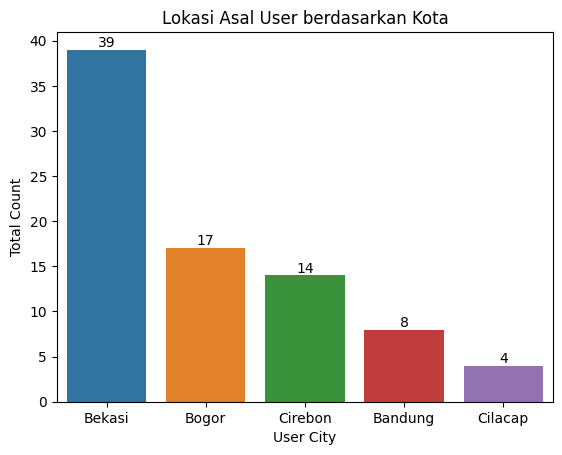

In [ ]:
# Creat barplot user_id
user_city_cat = sns.barplot(data=user_places_by_city, x='user_city', y='user_id', hue = 'user_city')
plt.title("Lokasi Asal User berdasarkan Kota")
plt.xlabel("User City")
plt.ylabel("Total Count")
for i in user_city_cat.containers:
  user_city_cat.bar_label(i,)

plt.show()

Dari diagram barplot di atas ditemukan bahwa top 5 lokasi user yang ada dalam data berasal dari Jawa Barat. Bekasi menjadi lokasi asal user nomor satu dari dengan total 39 orang.


In [ ]:
# Group by prov and user_loc places
user_places_by_prov = df.groupby('user_prov')['user_id'].nunique().reset_index()

# Sort values in descending order
user_places_by_prov = user_places_by_prov.sort_values(by = 'user_id', ascending=False)
user_places_by_prov

,user_prov,user_id
3,Jawa Barat,116
2,DKI Jakarta,46
4,Jawa Tengah,43
1,DIY,28
5,Jawa Timur,25
6,Sumatera Selatan,25
0,Banten,17


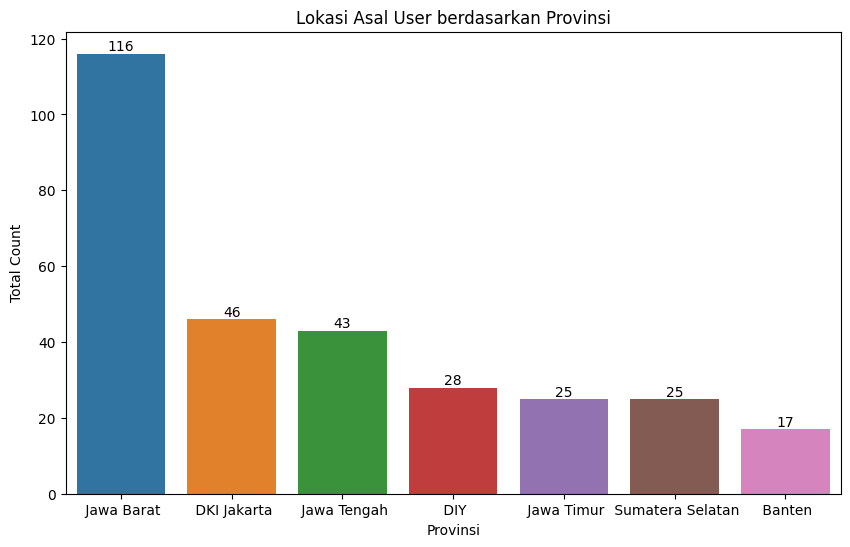

In [ ]:
# Creat barplot user_id
plt.figure(figsize=(10, 6))

user_prov_cat = sns.barplot(data=user_places_by_prov, x='user_prov', y='user_id', hue = 'user_prov')
plt.title("Lokasi Asal User berdasarkan Provinsi")
plt.xlabel("Provinsi")
plt.ylabel("Total Count")
for i in user_prov_cat.containers:
  user_prov_cat.bar_label(i,)

plt.show()

Jawa barat merupakan asal provinsi paling tinggi di angka 116.

## 4.2.- Analisa Rating dan Harga

### 4.2.1.- User Rating

In [ ]:
# Mengecek tingkat skewness data
df['user_rating'].skew()

-0.04789336749618849

Berdasarkan pengecekan tingkat skewness data user_rating, distribusi data memperoleh angka -0.0479. Dari hasil tersebut dapat disimpulkan bahwa data terdistribusi cenderung normal (nilai skewness dibawah -0.5).

In [ ]:
# Lower Bound dan Upper Bound
q1 = df['user_rating'].quantile(0.25)
q3 = df['user_rating'].quantile(0.75)
iqr = q3-q1

low_bound = q1 - 3 * iqr
up_bound = q3 + 3 * iqr

print(f'Lower Boundary data user_rating is: {low_bound:.2f}')
print(f'Upper Boundary data user_rating is: {up_bound:.2f}' )

outlier = df['user_rating'][(df['user_rating']<low_bound) | (df['user_rating']>up_bound)]
no_outlier = df['user_rating'][(df['user_rating']>=low_bound) & (df['user_rating']<=up_bound)]

print(f"Percentage of outliers: {len(outlier)*100/len(df['user_rating']):.2f}%%")

Lower Boundary data user_rating is: -4.00
Upper Boundary data user_rating is: 10.00
Percentage of outliers: 0.00%%


<Axes: >

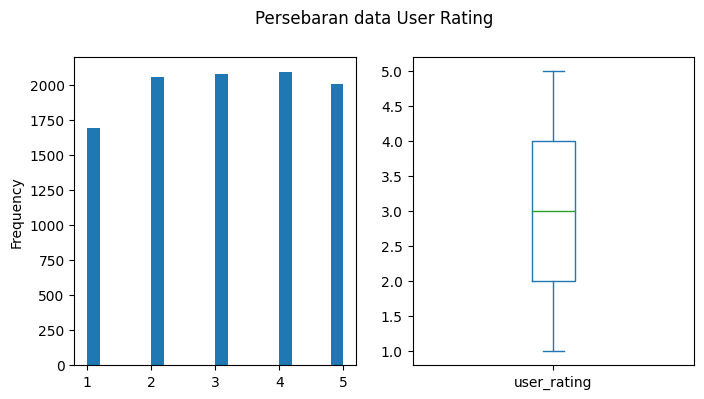

In [ ]:
# Membuat grafik persebaran data
fig, ax = plt.subplots(ncols=2,figsize=(8,4))

# Tambahkan Judul
fig.suptitle('Persebaran data User Rating', x=0.5, y=1.)

# Histogram
df['user_rating'].plot(kind='hist',bins=20,ax=ax[0])
# Boxplot
df['user_rating'].plot(kind='box',ax=ax[1])

Berdasarkan histogram, persebaran data dari tiap rating cenderung seimbang. Grafik boxplot juga menunjukkan bahwa tidak ada outlier dalam data.

### 4.2.2.- Rating Overall

In [ ]:
# Mengecek tingkat skewness data
df['rating_overall'].skew()

-0.6395689214957623

Dari pengcekan skewness data menunjukkan angka -0.639. Berdasarkan hasil tersebut dapat disimpulkan bahwa data rating_overall terdistribusi *moderately skew* (Nilai antara -1 < **-0.639** < -0.5)

In [ ]:
# Lower Bound dan Upper Bound
q1 = df['rating_overall'].quantile(0.25)
q3 = df['rating_overall'].quantile(0.75)
iqr = q3-q1

low_bound = q1 - 3 * iqr
up_bound = q3 + 3 * iqr

print(f'Lower Boundary data rating_overall is: {low_bound:.2f}')
print(f'Upper Boundary data rating_overall is: {up_bound:.2f}' )

outlier = df['rating_overall'][(df['rating_overall']<low_bound) | (df['rating_overall']>up_bound)]
no_outlier = df['rating_overall'][(df['rating_overall']>=low_bound) & (df['rating_overall']<=up_bound)]

print(f"Percentage of outliers: {len(outlier)*100/len(df['rating_overall']):.2f}%%")

Lower Boundary data rating_overall is: 3.80
Upper Boundary data rating_overall is: 5.20
Percentage of outliers: 0.73%%


<Axes: >

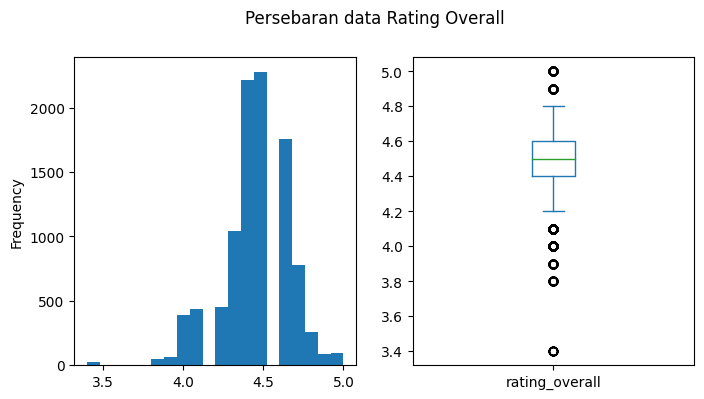

In [ ]:
# Membuat grafik persebaran data
fig, ax = plt.subplots(ncols=2,figsize=(8,4))

# Tambahkan Judul
fig.suptitle('Persebaran data Rating Overall', x=0.5, y=1.)

df['rating_overall'].plot(kind='hist',bins=20,ax=ax[0])
df['rating_overall'].plot(kind='box',ax=ax[1])

Berdasarkan plot histogram diatas, data rating_overall cenderung skew ke kiri. Selain itu, ditemukan 0.72% outlier dalam data yang telah ditunjukkan oleh chart boxplot. Handling outlier akan dilakukan dalam `Feature Engineering`.

### 4.2.3.- Harga

In [ ]:
# Analisis deskriptif data umur user
avg_price = df['price'].mean()
min_price = df['price'].min()
max_price = df['price'].max()

print('Rata-rata harga tiket adalah: {:.2f}'.format(avg_price))
print('Minimal harga tiket adalah:', (min_price))
print('Maksimal harga tiket adalah:', (max_price))

Rata-rata harga tiket adalah: 23774.32
Minimal harga tiket adalah: 0
Maksimal harga tiket adalah: 900000


In [ ]:
df['price'].skew()

7.295155817916952

Dari pengecekan skewness data menunjukkan angka 7.29. Berdasarkan hasil tersebut dapat disimpulkan bahwa data rating_overall terdistribusi *highly skew* (Nilai skewness lebih dari 1)

In [ ]:
# Lower Bound dan Upper Bound
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1

low_bound = q1 - 3 * iqr
up_bound = q3 + 3 * iqr

print(f'Lower Boundary data price is: {low_bound:.2f}')
print(f'Upper Boundary data price is: {up_bound:.2f}' )

outlier = df['price'][(df['price']<low_bound) | (df['price']>up_bound)]
no_outlier = df['price'][(df['price']>=low_bound) & (df['price']<=up_bound)]

print(f"Percentage of outliers: {len(outlier)*100/len(df['price']):.2f}%%")

Lower Boundary data price is: -60000.00
Upper Boundary data price is: 80000.00
Percentage of outliers: 6.69%%


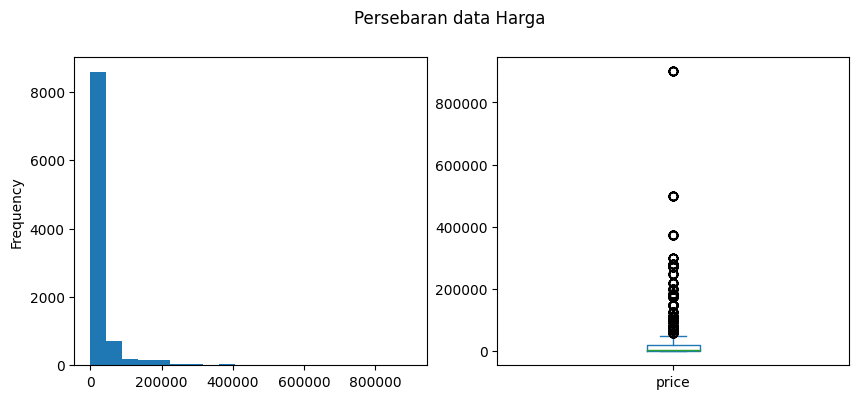

In [ ]:
# Membuat grafik persebaran data
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# Tambahkan Judul
fig.suptitle('Persebaran data Harga', x=0.5, y=1.)

df['price'].plot(kind='hist',bins=20,ax=ax[0])
df['price'].plot(kind='box',ax=ax[1]);

Berdasarkan plot histogram diatas, data price cenderung skew ke kiri. Selain itu, ditemukan 6.69% outlier dalam data yang telah ditunjukkan oleh chart boxplot. Handling outlier akan dilakukan dalam `Feature Engineering`.

### 4.2.3.- Korelasi Harga dan Rating

#### 4.2.3.1.- User Rating

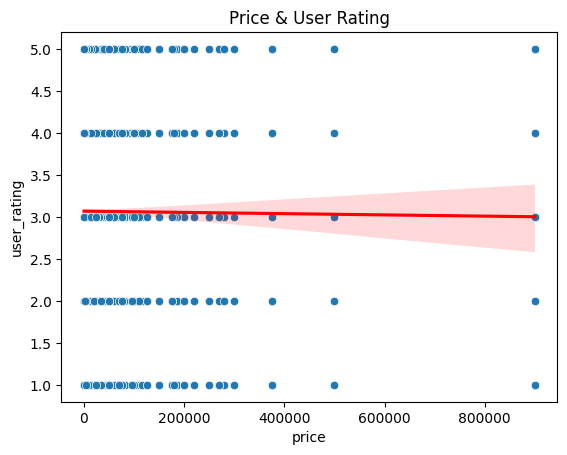

In [ ]:
# scat_df = sns.load_dataset("df")
sns.scatterplot(data = df, x='price', y='user_rating')

# Menambahkan tren menggunakan regplot
sns.regplot(data=df, x='price', y='user_rating', scatter=False, color='red')

# Tambahkan Judul
plt.title('Price & User Rating');

Grafik scatterplot tidak dapat menggambarkan secara jelas hubungan antara variabel user_rating dan price. Oleh sebab itu kita akan menggunakan metode korelasi kendall-tau untuk mengetahui hubungan antar dua variabel tersebut.

In [ ]:
# Mencari korelasi antar data dengan metode kendall-tau
corr_tau, pval_k = stats.kendalltau(df['price'], df['user_rating'])

# Mencetak hasil uji korelasi
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.00, p-value: 0.9122181289944686


Berdasarkan hasil pengecekan uji korelasi, tidak terdapat hubungan antara user_rating dan price. Hal ini ditunjukkan oleh nilai p-value yang melebihi nilai koefisien error di tingkat 5% (0.9122).

#### 4.2.3.2.- Rating Overall

Text(0.5, 1.0, 'Price & Overall Rating')

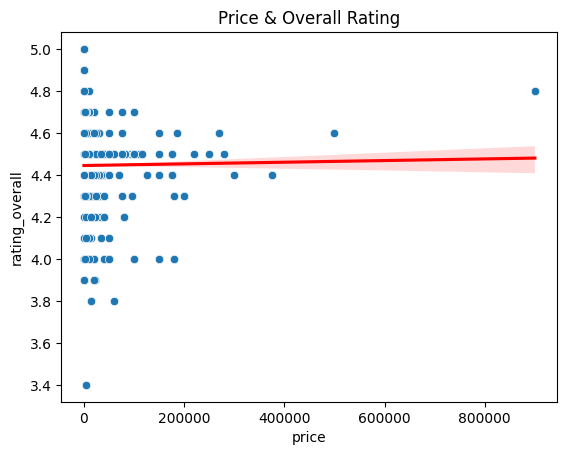

In [ ]:
# scat_df = sns.load_dataset("df")
sns.scatterplot(data = df, x='price', y='rating_overall')

# Menambahkan tren menggunakan regplot
sns.regplot(data=df, x='price', y='rating_overall', scatter=False, color='red')

# Tambahkan Judul
plt.title('Price & Overall Rating')

Garis scatterplot menunjukkan bahwa pergerakan garis cenderung bergerak naik (positif) meskipun pergerakannya kurang nampak terlihat. Untuk mengetahui hubungan antar dua variabel, kita akan melakukan pengecekan korelasi menggunakan metode kendall-tau correlation karena data variabel price yang terdistribusi skew.

In [ ]:
# Mencari korelasi antar data dengan metode kendall-tau
corr_tau, pval_k = stats.kendalltau(df['price'], df['rating_overall'])

# Mencetak hasil uji korelasi
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: -0.14, p-value: 1.5755583556559787e-72


Dengan membandingkan nilai p-value menggunakan tingkat koefisien error sebesar 0.05 atau 5%, dapat disimpulkan bahwa variabel harga dan rating_overall memiliki hubungan antar variabel. Kesimpulan ini didapat dikarenakan nilai p-value yang lebih kecil dibanding nilai koefisien error di angka 1.576e-72.

## 4.3.- Analisis Kota Wisata

In [ ]:
# Group by city and count unique places
popular_places_by_city = df.groupby('city')['place_name'].nunique().reset_index()

# Sort values in descending order
popular_places_by_city = popular_places_by_city.sort_values(by = 'place_name', ascending=False)

print(popular_places_by_city)

         city  place_name
4  Yogyakarta         126
0     Bandung         124
1     Jakarta          84
2    Semarang          57
3    Surabaya          46


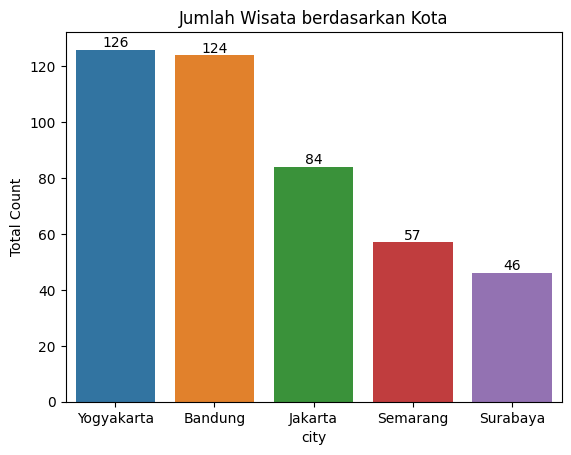

In [ ]:
# Creat barplot place_name
city_cat = sns.barplot(data=popular_places_by_city, x='city', y='place_name', hue = 'city')
plt.title("Jumlah Wisata berdasarkan Kota")
plt.xlabel("city")
plt.ylabel("Total Count")
for i in city_cat.containers:
  city_cat.bar_label(i,)

plt.show()

Dari database yang didapat, terdapat 5 kota yang ada dalam data dan tiap kota mewakili tiap provinsi yang ada di pulau jawa. Dalam data ditemukan bahwa Yogyakarta merupakan kota dengan tempat wisata paling banyak dengan jumlah 126 lokasi wisata.

## 4.4.- Analisis Kategori Wisata

In [ ]:
# Group by category and count unique places
popular_places_by_category = df.groupby('category')['place_name'].nunique().reset_index()

# Sort values in descending order
popular_places_by_category = popular_places_by_category.sort_values(by='place_name', ascending=False)
popular_places_by_category

,category,place_name
4,Taman Hiburan,135
1,Budaya,117
2,Cagar Alam,106
0,Bahari,47
5,Tempat Ibadah,17
3,Pusat Perbelanjaan,15


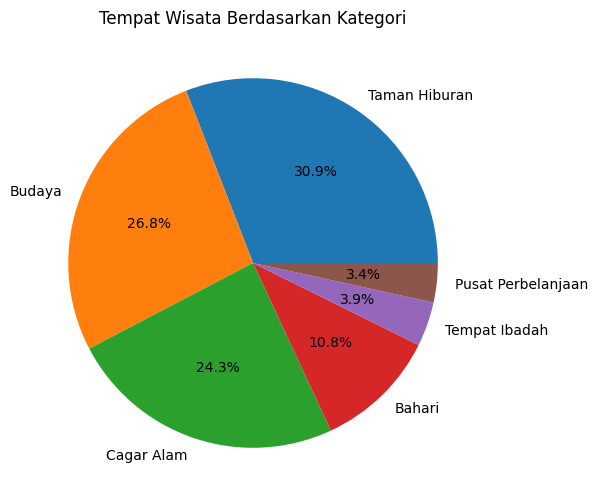

In [ ]:
# Pie Chart Category Group
plt.figure(figsize=(6,6))
plt.title("Tempat Wisata Berdasarkan Kategori")
plt.pie(popular_places_by_category['place_name'], labels=popular_places_by_category['category'], autopct='%1.1f%%')
plt.show()

Taman hiburan adalah kategori wisata dengan jumlah terbanyak dalam keseluruhan data dengan total 135 tempat hiburan mencapai 30.9% populasi data wisata.

In [ ]:
# Table Kategori data
category_data = df.groupby('category')[['user_rating', 'rating_overall', 'price']].mean()

# Sorting data
category_data = category_data.sort_values(by='user_rating', ascending=False)
category_data

,user_rating,rating_overall,price
category,,,
Taman Hiburan,3.118386,4.402447,34790.343915
Tempat Ibadah,3.086387,4.715707,968.586387
Cagar Alam,3.081352,4.403504,22536.712557
Budaya,3.032270,4.523302,16447.091932
Bahari,3.011194,4.368937,30258.395522
Pusat Perbelanjaan,2.947507,4.457218,0.000000


Tempat hiburan juga kategori wisata favorit dalam database berdasarkan rata-rata user rating. Rata-rata user rating untuk kategori taman hiburan mencapai angka 3.12. Dalam data juga ditemukan bahwa taman hiburan merupakan kategori tempat wisata dengan rata-rata harga paling mahal dibandingkan kategori tempat wisata lain.

In [ ]:
# Table Kategori data
city_data = df.groupby('city')[['user_rating', 'rating_overall', 'price']].mean()

# Sorting data
city_data = city_data.sort_values(by='user_rating', ascending=False)
city_data

,user_rating,rating_overall,price
city,,,
Yogyakarta,3.104986,4.465976,19402.387640
Bandung,3.079022,4.426754,24958.894401
Surabaya,3.078035,4.454239,11197.495183
Semarang,3.035850,4.369565,16425.629291
Jakarta,3.007361,4.491325,40492.113565


Yogyakarta merupakan kota favorit dalam data berdasarkan rata-rata user rating di angka 3.10.

## 4.5.- User Rating Kota Wisata tiap Kategori

In [ ]:
# Menghitung total tempat wisata dalam data
df['place_name'].nunique()

437

Terdapat 437 tempat wisata yang ada dalam database.

### 4.5.1.- Semua Kota

In [ ]:
# Yogyakarta Berdasarkan Kategori
all_cat_count = df.groupby('category')['user_rating'].count().reset_index()
all_cat_count = all_cat_count.sort_values(by = 'user_rating', ascending=False)
all_cat_count

,category,user_rating
4,Taman Hiburan,3024
1,Budaya,2665
2,Cagar Alam,2397
0,Bahari,1072
5,Tempat Ibadah,382
3,Pusat Perbelanjaan,381


In [ ]:
# Yogyakarta Berdasarkan Kategori
all_cat_mean = df.groupby('category')['user_rating'].mean().reset_index()
all_cat_mean = all_cat_mean.sort_values(by = 'user_rating', ascending=False)
all_cat_mean

,category,user_rating
4,Taman Hiburan,3.118386
5,Tempat Ibadah,3.086387
2,Cagar Alam,3.081352
1,Budaya,3.032270
0,Bahari,3.011194
3,Pusat Perbelanjaan,2.947507


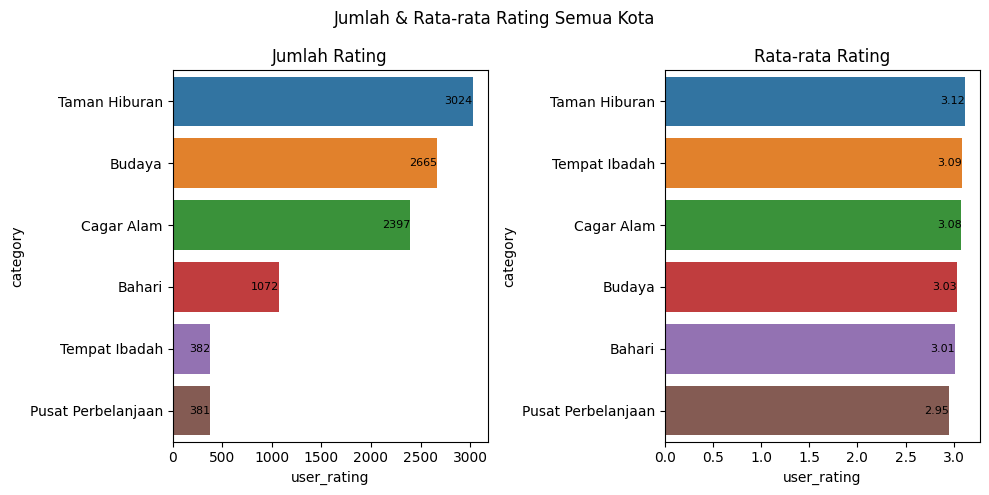

In [ ]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Bar chart count user rating
sns.barplot(data=all_cat_count, x='user_rating', y='category', ax=axes[0], ci=None, hue='category')
axes[0].set_title("Jumlah Rating")

# Menambahkan label di dalam bar chart count user rating
for i, val in enumerate(all_cat_count['user_rating']):
    axes[0].text(val, i, f'{val}', va='center', ha='right', color='black', fontsize=8)

# Bar chart mean user rating
sns.barplot(data=all_cat_mean, x='user_rating', y='category', ax=axes[1], ci=None, hue='category')
axes[1].set_title("Rata-rata Rating")

# Menambahkan label di dalam bar chart mean user_rating
for i, val in enumerate(all_cat_mean['user_rating']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='black', fontsize=8)

# Figure title
fig.suptitle("Jumlah & Rata-rata Rating Semua Kota")

plt.tight_layout()
plt.show();

- Berdasarkan jumlah rating yang didapatkan tiap kategori wisata, tempat hiburan merupakan kategori wisata favorit dengan total 3024 user pernah mengunjungi taman hiburan.
- Sedangkan dari bar chart rata-rata rating ditemukan keunikan dari tempat ibadah yang menempati tempat favorit ke-2 yang mana berbanding terbalik dengan jumlah rating yang didapat di angka 382 atau ke-2 terendah dalam data.

### 4.5.2.- Yogyakarta

In [ ]:
# Jumlah tiap category di Yogyakarta
yog = df[df['city'] == 'Yogyakarta'].groupby('category')['place_name'].nunique().reset_index()
yog.sort_values(by = 'place_name', ascending = False)

,category,place_name
4,Taman Hiburan,36
0,Bahari,34
1,Budaya,30
2,Cagar Alam,23
3,Pusat Perbelanjaan,3


Taman hiburan adalah kategori wisata terbanyak yang ada di Yogyakarta dengan total 36 tempat diikuti wisata Bahari dengan total 34 tempat.

In [ ]:
# Yogyakarta Berdasarkan Kategori
ygy_cat_count = df[df['city'] == 'Yogyakarta'].groupby('category')['user_rating'].count().reset_index()
ygy_cat_count = ygy_cat_count.sort_values(by = 'user_rating', ascending=False)
ygy_cat_count

,category,user_rating
4,Taman Hiburan,801
0,Bahari,779
1,Budaya,666
2,Cagar Alam,525
3,Pusat Perbelanjaan,77


In [ ]:
# Yogyakarta Berdasarkan Kategori
ygy_cat_mean = df[df['city'] == 'Yogyakarta'].groupby('category')['user_rating'].mean().reset_index()
ygy_cat_mean = ygy_cat_mean.sort_values(by = 'user_rating', ascending=False)
ygy_cat_mean

,category,user_rating
2,Cagar Alam,3.184762
4,Taman Hiburan,3.166042
0,Bahari,3.064185
3,Pusat Perbelanjaan,3.025974
1,Budaya,3.025526


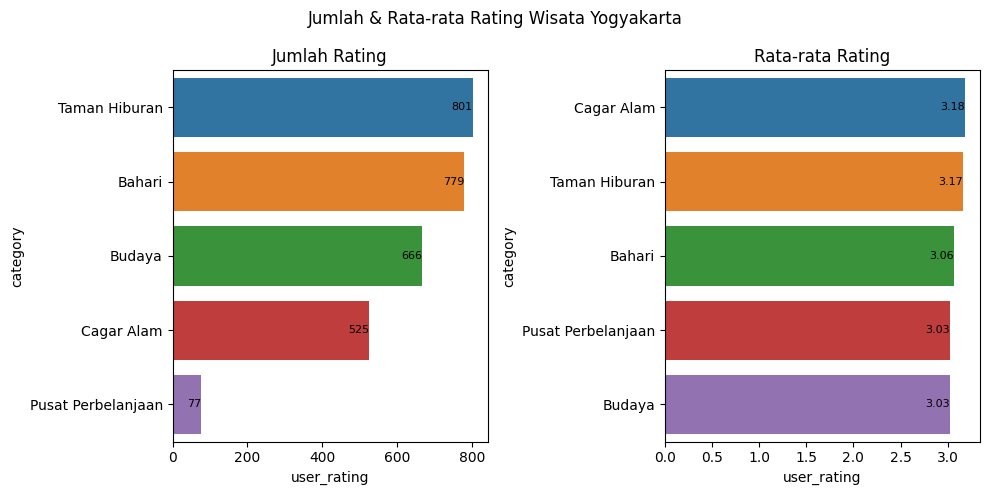

In [ ]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Bar chart count user rating
sns.barplot(data=ygy_cat_count, x='user_rating', y='category', ax=axes[0], ci=None, hue='category')
axes[0].set_title("Jumlah Rating")

# Menambahkan label di dalam bar chart count user rating
for i, val in enumerate(ygy_cat_count['user_rating']):
    axes[0].text(val, i, f'{val}', va='center', ha='right', color='black', fontsize=8)

# Bar chart mean user rating
sns.barplot(data=ygy_cat_mean, x='user_rating', y='category', ax=axes[1], ci=None, hue='category')
axes[1].set_title("Rata-rata Rating")

# Menambahkan label di dalam bar chart mean user_rating
for i, val in enumerate(ygy_cat_mean['user_rating']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='black', fontsize=8)

# Figure title
fig.suptitle("Jumlah & Rata-rata Rating Wisata Yogyakarta")

plt.tight_layout()
plt.show();


Taman hiburan merupakan kategori yang mendapatkan user rating paling banyak di Kota Yogyakarta dengan total 801 melakukan rating. Sedangkan dari sisi rata-rata user rating, Cagar alam merupakan tempat favorit di Yogyakarta dengan rating mencapai 3.18.

### 4.5.3.- Bandung

In [ ]:
# Jumlah tiap category di Bandung
bdg = df[df['city'] == 'Bandung'].groupby('category')['place_name'].nunique().reset_index()
bdg.sort_values(by = 'place_name', ascending = False)

,category,place_name
1,Cagar Alam,54
3,Taman Hiburan,39
0,Budaya,22
4,Tempat Ibadah,8
2,Pusat Perbelanjaan,1


Taman hiburan adalah kategori wisata terbanyak yang ada di Bandung dengan total 54 tempat.

In [ ]:
# Bandung Berdasarkan Kategori
bdg_cat_count = df[df['city'] == 'Bandung'].groupby('category')['user_rating'].count().reset_index()
bdg_cat_count = bdg_cat_count.sort_values(by = 'user_rating', ascending=False)
bdg_cat_count

,category,user_rating
1,Cagar Alam,1230
3,Taman Hiburan,861
0,Budaya,529
4,Tempat Ibadah,181
2,Pusat Perbelanjaan,21


In [ ]:
# Bandung Berdasarkan Kategori
bdg_cat_mean = df[df['city'] == 'Bandung'].groupby('category')['user_rating'].mean().reset_index()
bdg_cat_mean = bdg_cat_mean.sort_values(by = 'user_rating', ascending=False)
bdg_cat_mean

,category,user_rating
2,Pusat Perbelanjaan,3.285714
3,Taman Hiburan,3.168409
4,Tempat Ibadah,3.082873
1,Cagar Alam,3.064228
0,Budaya,2.958412


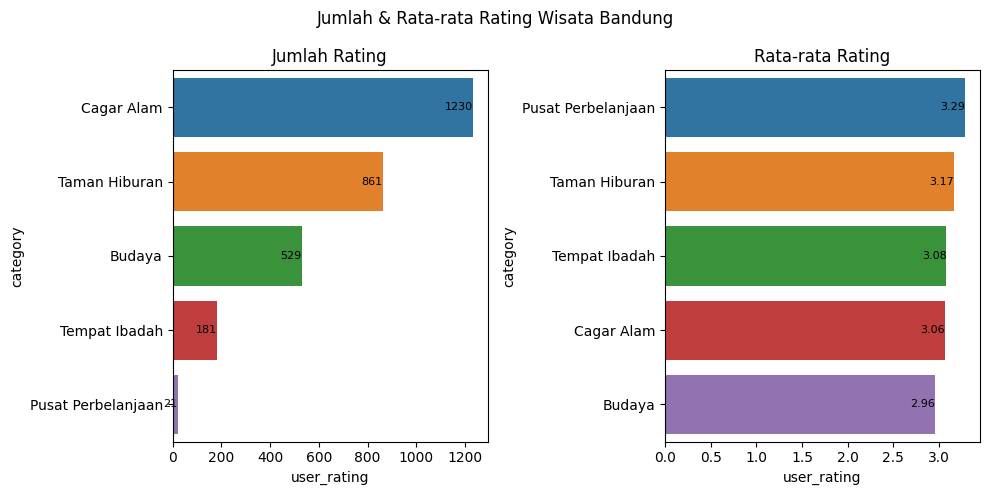

In [ ]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Bar chart count user rating
sns.barplot(data=bdg_cat_count, x='user_rating', y='category', ax=axes[0], ci=None, hue='category')
axes[0].set_title("Jumlah Rating")

# Menambahkan label di dalam bar chart count user rating
for i, val in enumerate(bdg_cat_count['user_rating']):
    axes[0].text(val, i, f'{val}', va='center', ha='right', color='black', fontsize=8)

# Bar chart mean user rating
sns.barplot(data=bdg_cat_mean, x='user_rating', y='category', ax=axes[1], ci=None, hue='category')
axes[1].set_title("Rata-rata Rating")

# Menambahkan label di dalam bar chart mean user_rating
for i, val in enumerate(bdg_cat_mean['user_rating']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='black', fontsize=8)

# Figure title
fig.suptitle("Jumlah & Rata-rata Rating Wisata Bandung")

plt.tight_layout()
plt.show();


Cagar Alam merupakan kategori yang mendapatkan user rating paling banyak di Kota Bandung dengan total 1230 melakukan rating. Sedangkan dari sisi rata-rata user rating, Pusat perbelanjaan merupakan tempat favorit di Bandung dengan rating mencapai 3.29, namun rata-rata rating ini didapat hanya dari 21 rating user.

### 4.5.4.- Jakarta

In [ ]:
# Jumlah tiap category di Jakarta
jkt = df[df['city'] == 'Jakarta'].groupby('category')['place_name'].nunique().reset_index()
jkt.sort_values(by = 'place_name', ascending = False)

,category,place_name
1,Budaya,32
4,Taman Hiburan,27
3,Pusat Perbelanjaan,10
0,Bahari,8
2,Cagar Alam,4
5,Tempat Ibadah,3


Budaya adalah kategori wisata terbanyak yang ada di Jakarta dengan total 32 tempat.

In [ ]:
# Jakarta Berdasarkan Kategori
jkt_cat_count = df[df['city'] == 'Jakarta'].groupby('category')['user_rating'].count().reset_index()
jkt_cat_count = jkt_cat_count.sort_values(by = 'user_rating', ascending=False)
jkt_cat_count

,category,user_rating
1,Budaya,719
4,Taman Hiburan,614
3,Pusat Perbelanjaan,251
0,Bahari,168
2,Cagar Alam,75
5,Tempat Ibadah,75


In [ ]:
# Jakarta Berdasarkan Kategori
jkt_cat_mean = df[df['city'] == 'Jakarta'].groupby('category')['user_rating'].mean().reset_index()
jkt_cat_mean = jkt_cat_mean.sort_values(by = 'user_rating', ascending=False)
jkt_cat_mean

,category,user_rating
2,Cagar Alam,3.186667
1,Budaya,3.084840
4,Taman Hiburan,3.019544
5,Tempat Ibadah,2.880000
3,Pusat Perbelanjaan,2.860558
0,Bahari,2.827381


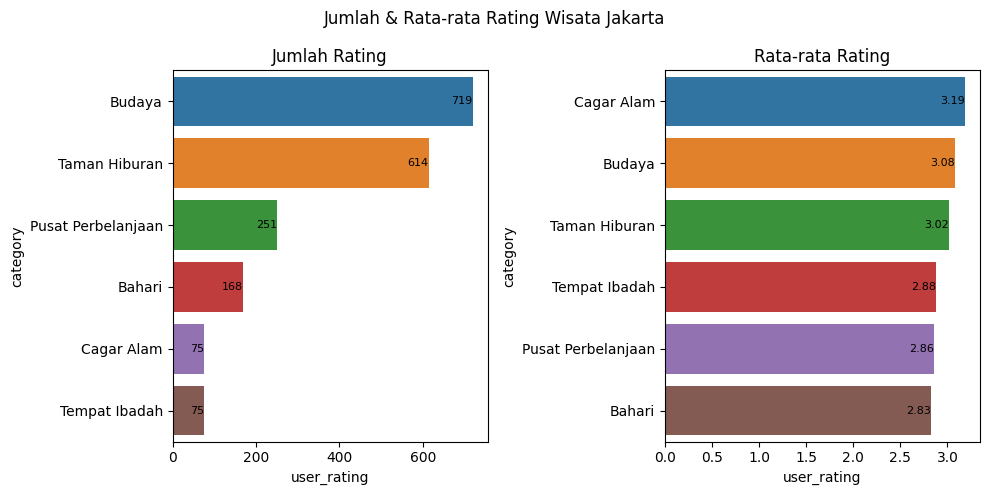

In [ ]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Bar chart count user rating
sns.barplot(data=jkt_cat_count, x='user_rating', y='category', ax=axes[0], ci=None, hue='category')
axes[0].set_title("Jumlah Rating")

# Menambahkan label di dalam bar chart count user rating
for i, val in enumerate(jkt_cat_count['user_rating']):
    axes[0].text(val, i, f'{val}', va='center', ha='right', color='black', fontsize=8)

# Bar chart mean user rating
sns.barplot(data=jkt_cat_mean, x='user_rating', y='category', ax=axes[1], ci=None, hue='category')
axes[1].set_title("Rata-rata Rating")

# Menambahkan label di dalam bar chart mean user_rating
for i, val in enumerate(jkt_cat_mean['user_rating']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='black', fontsize=8)

# Figure title
fig.suptitle("Jumlah & Rata-rata Rating Wisata Jakarta")

plt.tight_layout()
plt.show();


Budaya merupakan kategori yang mendapatkan user rating paling banyak di Kota Jakarta dengan total 719 melakukan rating. Sedangkan dari sisi rata-rata user rating, Cagar alam merupakan tempat favorit di Jakarta dengan rating mencapai 3.19, namun rata-rata rating ini didapat hanya dari 75 rating user.

### 4.5.5.- Semarang

In [ ]:
# Jumlah tiap category di Semarang
smr = df[df['city'] == 'Semarang'].groupby('category')['place_name'].nunique().reset_index()
smr.sort_values(by = 'place_name', ascending = False)

,category,place_name
2,Cagar Alam,20
1,Budaya,15
3,Taman Hiburan,15
0,Bahari,4
4,Tempat Ibadah,3


Cagar Alam adalah kategori wisata terbanyak yang ada di Semarang dengan total 20 tempat.

In [ ]:
# Semarang Berdasarkan Kategori
smr_cat_count = df[df['city'] == 'Semarang'].groupby('category')['user_rating'].count().reset_index()
smr_cat_count = smr_cat_count.sort_values(by = 'user_rating', ascending=False)
smr_cat_count

,category,user_rating
2,Cagar Alam,456
3,Taman Hiburan,352
1,Budaya,349
0,Bahari,99
4,Tempat Ibadah,55


In [ ]:
# Semarang Berdasarkan Kategori
smr_cat_mean = df[df['city'] == 'Semarang'].groupby('category')['user_rating'].mean().reset_index()
smr_cat_mean = smr_cat_mean.sort_values(by = 'user_rating', ascending=False)
smr_cat_mean

,category,user_rating
4,Tempat Ibadah,3.127273
3,Taman Hiburan,3.090909
2,Cagar Alam,3.039474
1,Budaya,2.991404
0,Bahari,2.929293


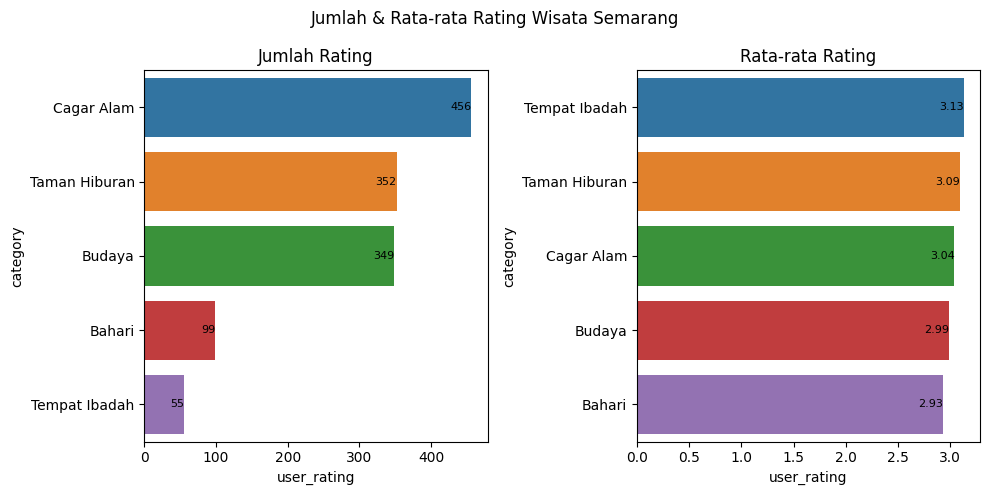

In [ ]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Bar chart count user rating
sns.barplot(data=smr_cat_count, x='user_rating', y='category', ax=axes[0], ci=None, hue='category')
axes[0].set_title("Jumlah Rating")

# Menambahkan label di dalam bar chart count user rating
for i, val in enumerate(smr_cat_count['user_rating']):
    axes[0].text(val, i, f'{val}', va='center', ha='right', color='black', fontsize=8)

# Bar chart mean user rating
sns.barplot(data=smr_cat_mean, x='user_rating', y='category', ax=axes[1], ci=None, hue='category')
axes[1].set_title("Rata-rata Rating")

# Menambahkan label di dalam bar chart mean user_rating
for i, val in enumerate(smr_cat_mean['user_rating']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='black', fontsize=8)

# Figure title
fig.suptitle("Jumlah & Rata-rata Rating Wisata Semarang")

plt.tight_layout()
plt.show();


Cagar Alam merupakan kategori yang mendapatkan user rating paling banyak di Kota Semarang dengan total 456 melakukan rating. Sedangkan dari sisi rata-rata user rating, Tempat ibadah merupakan tempat favorit di Semarang dengan rating mencapai 3.13, namun rata-rata rating ini didapat hanya dari 55 rating user.

### 4.5.6.- Surabaya

In [ ]:
# Jumlah tiap category di Surabaya
sby = df[df['city'] == 'Surabaya'].groupby('category')['place_name'].nunique().reset_index()
sby.sort_values(by = 'place_name', ascending = False)

,category,place_name
1,Budaya,18
4,Taman Hiburan,18
2,Cagar Alam,5
5,Tempat Ibadah,3
0,Bahari,1
3,Pusat Perbelanjaan,1


Budaya adalah kategori wisata terbanyak yang ada di Surabaya dengan total 18 tempat.

In [ ]:
# Surabaya Berdasarkan Kategori
sby_cat_count = df[df['city'] == 'Surabaya'].groupby('category')['user_rating'].count().reset_index()
sby_cat_count = sby_cat_count.sort_values(by = 'user_rating', ascending=False)
sby_cat_count

,category,user_rating
1,Budaya,402
4,Taman Hiburan,396
2,Cagar Alam,111
5,Tempat Ibadah,71
3,Pusat Perbelanjaan,32
0,Bahari,26


In [ ]:
# Surabaya Berdasarkan Kategori
sby_cat_mean = df[df['city'] == 'Surabaya'].groupby('category')['user_rating'].mean().reset_index()
sby_cat_mean = sby_cat_mean.sort_values(by = 'user_rating', ascending=False)
sby_cat_mean

,category,user_rating
5,Tempat Ibadah,3.281690
3,Pusat Perbelanjaan,3.218750
4,Taman Hiburan,3.090909
1,Budaya,3.082090
0,Bahari,2.923077
2,Cagar Alam,2.882883


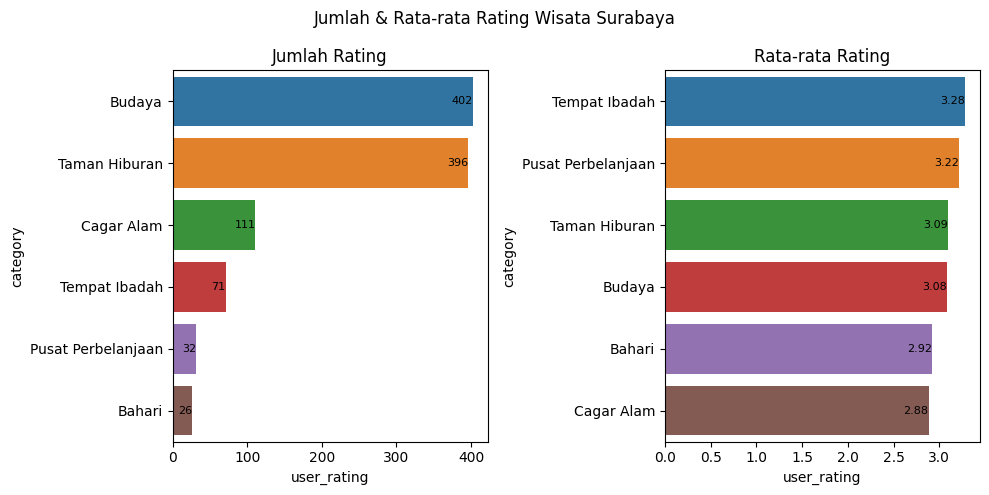

In [ ]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Bar chart count user rating
sns.barplot(data=sby_cat_count, x='user_rating', y='category', ax=axes[0], ci=None, hue='category')
axes[0].set_title("Jumlah Rating")

# Menambahkan label di dalam bar chart count user rating
for i, val in enumerate(sby_cat_count['user_rating']):
    axes[0].text(val, i, f'{val}', va='center', ha='right', color='black', fontsize=8)

# Bar chart mean user rating
sns.barplot(data=sby_cat_mean, x='user_rating', y='category', ax=axes[1], ci=None, hue='category')
axes[1].set_title("Rata-rata Rating")

# Menambahkan label di dalam bar chart mean user_rating
for i, val in enumerate(sby_cat_mean['user_rating']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='black', fontsize=8)

# Figure title
fig.suptitle("Jumlah & Rata-rata Rating Wisata Surabaya")

plt.tight_layout()
plt.show();


Budaya merupakan kategori yang mendapatkan user rating paling banyak di Kota Surabaya dengan total 402 melakukan rating. Sedangkan dari sisi rata-rata user rating, Tempat ibadah merupakan tempat favorit di Surabaya dengan rating mencapai 3.28.

## 4.6.- Paket Wisata

In [ ]:
# Group by category and count unique places
package_by_city = df_2.groupby('city')['package'].nunique().reset_index()

# Sort values in descending order
package_by_city = package_by_city.sort_values(by='package', ascending=False)
package_by_city

,city,package
0,Bandung,20
1,Jakarta,20
2,Semarang,20
3,Surabaya,20
4,Yogyakarta,20


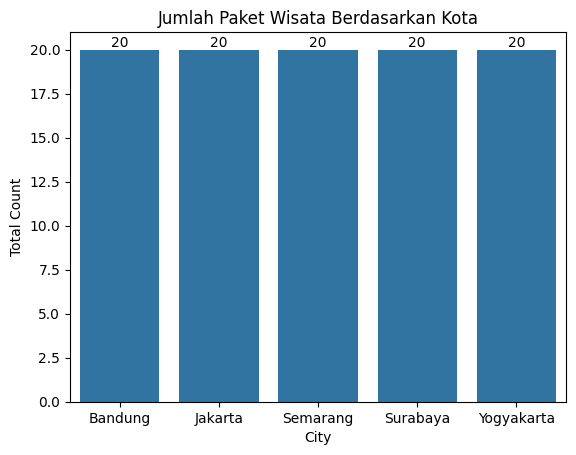

In [ ]:
# Creat barplot package
city_cat = sns.barplot(data=package_by_city, x='city', y='package')
plt.title("Jumlah Paket Wisata Berdasarkan Kota")
plt.xlabel("City")
plt.ylabel("Total Count")
for i in city_cat.containers:
  city_cat.bar_label(i,)

plt.show()

# 5.- Feature Engineering

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/raw_data_final_project.csv')
df_travel = pd.read_csv('/content/drive/MyDrive/package_tourism.csv')

# Drop data duplicates
df = df.drop_duplicates()
df_travel = df_travel.drop_duplicates()

# Handling Missing Value
df = df.filna('None')
df_travel = df_travel.fillna('None')

## 5.1 Feture Selection

In [ ]:
df.head()

,user_id,location,age,user_rating,place_id,place_name,description,category,city,price,rating_overall,time_minutes,coordinate,lat,long
0,1,"Semarang, Jawa Tengah",20,3,179,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,1,"Semarang, Jawa Tengah",20,2,344,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,NaN,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329
2,1,"Semarang, Jawa Tengah",20,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
3,1,"Semarang, Jawa Tengah",20,3,373,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602
4,1,"Semarang, Jawa Tengah",20,4,101,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,NaN,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151


Dari hasil EDA yang telah dilakukan rekan saya Data Analyst, kolom yang saya putuskan untuk dipakai menjadi dataset model diantaranya:
- Kolom Categorical Nominal: `place_id, place_name, city, category, deskripsi`

Semua kolom yang saya pilih dikarenakan berkaitan dengan output model rekomendasi yang akan dibuat yaitu tempat wisata.

Untuk meningkatkan kemiripan destinasi wisata dengan yang tempat yang lain. Saya akan melakukan penggabungan isi kolom city dan category, sehingga jika user memasukkan nama kota maka akan keluar rekomendasi destinasi yang sejenis.

In [ ]:
# Merge Column
df['description'] = df['description']+' '+df['city']+' '+df['category']

# Feature for Model
dfm = df[['place_id','place_name','city','category','description']]
dfm = dfm.drop_duplicates()

# Show 5 top data for model
dfm.head()

,place_id,place_name,city,category,description
0,179,Candi Ratu Boko,Yogyakarta,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...
1,344,Pantai Marina,Semarang,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans..."
2,5,Atlantis Water Adventure,Jakarta,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...
3,373,Museum Kereta Ambarawa,Semarang,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...
4,101,Kampung Wisata Sosro Menduran,Yogyakarta,Budaya,Kampung wisata Sosromenduran merupakan kampung...


In [ ]:
dfm_travel = df_travel[['Package','City']]
dfm_travel['Places'] = df_travel['Place_Tourism1']+' '+df_travel['Place_Tourism2']+ ' ' +df_travel['Place_Tourism3']+ ' ' +df_travel['Place_Tourism4']+' '+df_travel['Place_Tourism5']
dfm_travel.head()

,Package,City,Places
0,1,Jakarta,Pasar Tanah Abang Taman Ayodya Museum Tekstil ...
1,2,Jakarta,Pasar Tanah Abang Pasar Taman Puring Pasar Pet...
2,3,Jakarta,Perpustakaan Nasional Monas Masjid Istiqlal No...
3,4,Jakarta,Pulau Tidung Pulau Bidadari Pulau Pari Pulau P...
4,5,Jakarta,Museum Satria Mandala Museum Wayang Museum Bah...


In [ ]:
# Show total data in model dataset
print('Total destinasi wisata pada dataset model:', dfm.place_name.nunique())

Total destinasi wisata pada dataset model: 437


## 5.2 Text Preprocessing

Karena kita akan membuat model berdasarkan deskripsi tempat wisata. Sehingga kita akan melakukan pembersihan deskripsi tempat wisata dengan menghapus stopword yang ada pada deskripsi. Ini dipergunakan agar deskripsi tempat wisata hanya mengandung kata-kata penting saja, sehingga model rekomendasi bisa merekomendasikan tempat wisata lain yang memiliki kemiripan deskripsi tanpa terganggu stopwords.

In [ ]:
# Define Stopwords
stpwds_id = list(set(stopwords.words('indonesian')))
new_word = ['bahasa', 'inggris', 'selatan', 'utara', 'barat', 'timur', 'km', 'ha', 'meter', 'tinggi', 'lantas', 'sih',
            'dulunya', 'budget', 'mayoritas', 'heran', 'kaum', 'unjung', 'kawula', 'karcis', 'parkir', 'bangun', 'ciri',
            'a', 'm', 'jalan', 'kota', 'buka', 'None']
stpwds_id.extend(new_word)

# Define Stemming
stemmer = StemmerFactory().create_stemmer()

Setelah mendefinisikan stopwords dan menambahkan kata pada stopwords. Selanjutnya kita buat function untuk membersihkan deskripsi dari symbol, angka, whitespace, dan melakukan tokenization, melakukan stemming pada kolom deskripsi.

In [ ]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Number Removal
  text = re.sub(r"[0-9]", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_id]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

Selanjutnya kita terapkan function yang telah dibuat ke data kolom deskripsi menjadi kolom baru preprocess.

In [ ]:
# Applying Text Preprocessing to the Dataset
dfm['preprocess'] = dfm['description'].apply(lambda x: text_preprocessing(x))

# Show 5 top data
dfm.head()

,place_id,place_name,city,category,description,preprocess
0,179,Candi Ratu Boko,Yogyakarta,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,situs ratu baka candi boko hanacaraka jawa can...
1,344,Pantai Marina,Semarang,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",pantai marina jawa translit pasisir marina sal...
2,5,Atlantis Water Adventure,Jakarta,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,atlantis water adventure kenal atlantis ancol ...
3,373,Museum Kereta Ambarawa,Semarang,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,museum kereta api ambarawa indonesian railway ...
4,101,Kampung Wisata Sosro Menduran,Yogyakarta,Budaya,Kampung wisata Sosromenduran merupakan kampung...,kampung wisata sosromenduran kampung wisata un...


Deskripsi tempat wisata berhasil dibersihkan dari stopwords dan telah dilakukan strimming. Hasil deskripsi yang telah dilakukan cleaning kami masukkan pada kolom preprocess.

In [ ]:
# Applying Text Preprocessing to the Dataset
dfm_travel['Places'] = dfm_travel['Places'].apply(lambda x: text_preprocessing(x))

dfm_travel.head()

,Package,City,Places
0,1,Jakarta,pasar tanah abang taman ayodya museum tekstil ...
1,2,Jakarta,pasar tanah abang pasar taman puring pasar pet...
2,3,Jakarta,pustaka nasional monas masjid istiqlal none none
3,4,Jakarta,pulau tidung pulau bidadari pulau pari pulau p...
4,5,Jakarta,museum satria mandala museum wayang museum bah...


# 6. Model Definition

## 6.2 Content Based Filtering with Input Place Name

Metode content based filtering bertujuan untuk menyarankan item yang mirip dengan item yang disukai pengguna berdasarkan historynya. Cara kerja metode ini dengan mempelajari profil user baru berdasarkan item yang pernah disukai dan dirating. Selanjutnya akan menyarankan item yang serupa dengan item yang pernah disukai.

Metode ini memiliki kelebihan, semakin banyak informasi yang diberikan pengguna, maka semakin baik akurasi sistem rekomendasi.

### 6.2.1 TF IDF Vectorizer

TF-IDF Vectorizer digunakan untuk menemukan representasi fitur yang penting dari setiap kategori destinasi wisata. Library ini dari scikit-learn akan mengubah nilai-nilai tersebut menjadi vektor dengan menggunakan metode fit_transform dan transform, serta melakukan pemecahan data menjadi bagian-bagian yang lebih kecil secara langsung.

In [ ]:
# Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dfm['preprocess'])

# Convert tfidf_matrix to DataFrame with place name as index
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=dfm['place_name'], columns=tfidf_vectorizer.get_feature_names_out())

# Show Top 5 Data
tfidf_df.head()

abad  abadi  abah  abang  abdul  abdullah  \
place_name                                                                 
Candi Ratu Boko                 0.0    0.0   0.0    0.0    0.0       0.0   
Pantai Marina                   0.0    0.0   0.0    0.0    0.0       0.0   
Atlantis Water Adventure        0.0    0.0   0.0    0.0    0.0       0.0   
Museum Kereta Ambarawa          0.0    0.0   0.0    0.0    0.0       0.0   
Kampung Wisata Sosro Menduran   0.0    0.0   0.0    0.0    0.0       0.0   

                               abdurrahman  abraham  abrasi  abu  acara  aceh  \
place_name                                                                      
Candi Ratu Boko                        0.0      0.0     0.0  0.0    0.0   0.0   
Pantai Marina                          0.0      0.0     0.0  0.0    0.0   0.0   
Atlantis Water Adventure               0.0      0.0     0.0  0.0    0.0   0.0   
Museum Kereta Ambarawa                 0.0      0.0     0.0  0.0    0.0   0.0   
Kampung Wisata Sosro Menduran          0.0      0.0     0.0  0.0    0.0   0.0   

                               achitect  acu   ad  ada  adab  adam  adapula  \
place_name                                                                    
Candi Ratu Boko                     0.0  0.0  0.0  0.0   0.0   0.0      0.0   
Pantai Marina                       0.0  0.0  0.0  0.0   0.0   0.0      0.0   
Atlantis Water Adventure            0.0  0.0  0.0  0.0   0.0   0.0      0.0   
Museum Kereta Ambarawa              0.0  0.0  0.0  0.0   0.0   0.0      0.0   
Kampung Wisata Sosro Menduran       0.0  0.0  0.0  0.0   0.0   0.0      0.0   

                               adat  ade  adem  adha  adhyatma  adidas  adil  \
place_name                                                                     
Candi Ratu Boko                 0.0  0.0   0.0   0.0       0.0     0.0   0.0   
Pantai Marina                   0.0  0.0   0.0   0.0       0.0     0.0   0.0   
Atlantis Water Adventure        0.0  0.0   0.0   0.0       0.0     0.0   0.0   
Museum Kereta Ambarawa          0.0  0.0   0.0   0.0       0.0     0.0   0.0   
Kampung Wisata Sosro Menduran   0.0  0.0   0.0   0.0       0.0     0.0   0.0   

                               adisucipto  adjie  administrasi  administratif  \
place_name                                                                      
Candi Ratu Boko                       0.0    0.0           0.0       0.000000   
Pantai Marina                         0.0    0.0           0.0       0.000000   
Atlantis Water Adventure              0.0    0.0           0.0       0.000000   
Museum Kereta Ambarawa                0.0    0.0           0.0       0.113249   
Kampung Wisata Sosro Menduran         0.0    0.0           0.0       0.000000   

                               adopsi  adrenalin  adrenaline  adu  aduk  \
place_name                                                                
Candi Ratu Boko                   0.0        0.0         0.0  0.0   0.0   
Pantai Marina                     0.0        0.0         0.0  0.0   0.0   
Atlantis Water Adventure          0.0        0.0         0.0  0.0   0.0   
Museum Kereta Ambarawa            0.0        0.0         0.0  0.0   0.0   
Kampung Wisata Sosro Menduran     0.0        0.0         0.0  0.0   0.0   

                               adventure  afdeling  africa  afrika  aga  agam  \
place_name                                                                      
Candi Ratu Boko                 0.000000       0.0     0.0     0.0  0.0   0.0   
Pantai Marina                   0.000000       0.0     0.0     0.0  0.0   0.0   
Atlantis Water Adventure        0.177126       0.0     0.0     0.0  0.0   0.0   
Museum Kereta Ambarawa          0.000000       0.0     0.0     0.0  0.0   0.0   
Kampung Wisata Sosro Menduran   0.000000       0.0     0.0     0.0  0.0   0.0   

                               agama  agency  agenda  ageng  aglomerat  agro  \
place_name                                                               

Mengonversi matriks tf-idf menjadi sparse matrix di Python dapat berguna untuk beberapa alasan. Pertama, sparse matrix lebih hemat memori daripada dense matrix. Hal ini sering terjadi pada matriks tf-idf, dimana banyak kata yang tidak muncul di banyak dokumen. Kedua, dapat menghemat waktu dan memori..

In [ ]:
# Convert tfidf_df to a sparse matrix
tfidf_matrix_sprase = scipy.sparse.csr_matrix(tfidf_df.values)

### 6.2.2 Cosine Similarity

Melakukan perhitungan derajat kesamaan antar tempat wisata dengan metode cosine similarity

In [ ]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix_sprase)

# Display the cosine similarity
cosine_sim

array([[1.        , 0.03736142, 0.00504079, ..., 0.00801378, 0.00989204,
        0.0043113 ],
       [0.03736142, 1.        , 0.00788751, ..., 0.02404907, 0.        ,
        0.01407401],
       [0.00504079, 0.00788751, 1.        , ..., 0.03813188, 0.02015567,
        0.03934629],
       ...,
       [0.00801378, 0.02404907, 0.03813188, ..., 1.        , 0.03740715,
        0.        ],
       [0.00989204, 0.        , 0.02015567, ..., 0.03740715, 1.        ,
        0.        ],
       [0.0043113 , 0.01407401, 0.03934629, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Create DataFrame with movie titles as index and columns
cosine_sim_df = pd.DataFrame(cosine_sim, index=tfidf_df.index, columns=tfidf_df.index)
print('Shape:', cosine_sim_df.shape)

# Display the cosine similarity DataFrame
cosine_sim_df

Shape: (437, 437)


place_name,Candi Ratu Boko,Pantai Marina,Atlantis Water Adventure,Museum Kereta Ambarawa,Kampung Wisata Sosro Menduran,Taman Hutan Raya Ir. H. Juanda,Museum Gedung Sate,Museum Taman Prasasti,Pantai Ngrawe (Mesra),Taman Harmoni Keputih,Tugu Pal Putih Jogja,Taman Sungai Mudal,De Mata Museum Jogja,Surabaya North Quay,Museum Bahari Jakarta,Grand Maerakaca,Margasatwa Muara Angke,Curug Anom,Museum Konferensi Asia Afrika,Taman Cattleya,Monumen Bambu Runcing Surabaya,Pasar Seni,Curug Tilu Leuwi Opat,Museum Mandala Wangsit Siliwangi,Museum Wayang,Gua Pawon,Perkebunan Teh Malabar,Masjid Pusdai,Taman Ismail Marzuki,Bentara Budaya Yogyakarta (BBY),Kota Tua,Bukit Jamur,Gereja Katedral,Taman Pintar Yogyakarta,Wisata Eling Bening,Hutan Kota Srengseng,Puncak Pinus Becici,Bangsal Pagelaran,Pantai Krakal,Museum TNI AL Loka Jala Crana,Brown Canyon,Gereja Perawan Maria Tak Berdosa Surabaya,Candi Donotirto,Museum Gunung Merapi,Taman Ekspresi Dan Perpustakaan,Tektona Waterpark,Geoforest Watu Payung Turunan,Kampung Tematik Jawi,Balai Kota Surabaya,Durian Gardens and Tourism Education Watu Simbar,Wisata Lereng Kelir,Kebun Teh Nglinggo,Museum Bank Indonesia,Glamping Lakeside Rancabali,Wot Batu,Masjid Raya Bandung,Museum Fatahillah,Kawah Rengganis Cibuni,Taman Bunga Cihideung,Museum Kesehatan Dr. Adhyatma,Pantai Ngandong,Jembatan Pasupati,Pesona Nirwana Waterpark & Cottages,Museum Sonobudoyo Unit I,Taman Agrowisata Cilangkap,Perpustakaan Nasional,Taman Suropati,Alun-Alun Kota Bandung,Keraton Yogyakarta,Upside Down World Bandung,Watu Lumbung,Kampoeng Kopi Banaran,Candi Sewu,Tebing Breksi,Museum Nasional,Gumuk Pasir Parangkusumo,Desa Wisata Gamplong,Museum Sri Baduga,Panghegar Waterboom Bandung,Taman Budaya Yogyakarta,Pantai Greweng,Museum Joang 45,Semarang Chinatown,Sudut Pandang Bandung,Curug Dago,Museum Satria Mandala,Pura Giri Natha,Rumah Batik,Museum Benteng Vredeburg Yogyakarta,Taman Mini Indonesia Indah (TMII),La Kana Chapel,The Escape Hunt,Situs Warungboto,Monumen Selamat Datang,Pulau Pelangi,Kebun Bibit Wonorejo,Taman Tabanas,Rabbit Town,Museum Pendidikan Nasional,Taman Film,Observatorium Bosscha,Museum Tengah Kebun,Monumen Yogya Kembali,Jogja Exotarium,Taman Flora Bratang Surabaya,Taman Prestasi,Sanghyang Heuleut,Pasar Petak Sembilan,Klenteng Jin De Yuan,Taman Bungkul,Pelabuhan Marina,Desa Wisata Kelor,Tugu Proklamasi,Hutan Pinus Asri,Taman Kunang-Kunang,Flower Farm Setiya Aji,Lereng Anteng Panoramic Coffee Place,Seribu Batu Songgo Langit,Sea World,Pantai Samas,Indonesia Kaya Park,Tugu Muda Semarang,Kampoeng Rawa,Museum Mpu Tantular,Surabaya Museum (Gedung Siola),Candi Gedong Songo,Monumen Sanapati,Chingu Cafe Little Seoul,Tebing Karaton,Goa Pindul,Caringin Tilu,Nol Kilometer Jl.Malioboro,Museum Sasmita Loka Ahmad Yani,Monumen Batik Yogyakarta,Monumen Bandung Lautan Api,Kampung Korea Bandung,Jurang Tembelan Kanigoro,Taman Bunga Celosia,Candi Prambanan,Kampung Batik Gedong Semarang,Taman Buah Surabaya,Lava Bantal,Gunung Lalakon,Ciputra Waterpark,Dago Dreampark,Goa Rong,Museum Barli,Bumi Perkemahan Batu Kuda,Gedung Sate,Pantai Goa Cemara,Air Terjun Sri Gethuk,Jogja Bay Pirates Adventure Waterpark,Bukit Lintang Sewu,Masjid Al-Imtizaj,Batununggal Indah Club,Kampung Wisata Kadipaten,Goa Rancang Kencono,Pulau Pramuka,Kiara Artha Park,Wisata Alam Mangrove Angke,Taman Hutan Tebet,Pantai Pok Tunggal,Sungai Palayangan,Taman Pelangi Yogyakarta,Gua Belanda,Jakarta Aquarium dan Safari,Pantai Nglambor,Curug Cipanas,Pasar Tanah Abang,Studio Alam Gamplong,Pintoe Langit Dahromo,Panama Park 825,Pantai Ancol,Taman Menteng,Gunung Manglayang,Food Junction Grand Pakuwon,Pantai Ngrenehan,Klenteng Sanggar Agung,Situ Cileunca,Wisata Kaliurang,GunungTangkuban perahu,Wisata Agro Edukatif Istana Susu Cibugary,Gereja Katedral Santo Petrus Bandung,Taman Barunawati,Selasar Sunaryo Art Space,Kyotoku Floating Market,Pantai Sadranan,Keraton Surabaya,Jembatan Biru Ambarawa,Gunung Papandayan,Desa Wisata Sungai Code Jogja Kota,Desa Wisata Pulesari,Orchid Forest Cikole,Hutan Wisata

# 7. Model Training

## 7.1 Input Place Name

### 7.1.1 Place Name Recommender System

In [ ]:
def sorting(mv):
    # Ambil kota dari tempat yang dipilih
    city = dfm.loc[dfm['place_name'] == mv, 'city'].iloc[0]
    # Compute the similarity scores and show the top 20 recommended places
    top_sims = cosine_sim_df[mv].drop(index=mv).sort_values(ascending=False).iloc[:20]
    # Format the output as a list of tuples
    output = [(top_sims.index[i], top_sims.values[i]) for i in range(len(top_sims))]
    # Print the output
    print(f'You like {mv}, so based on our recommender system, We recommend you to go to:')
    count = 0
    for i, (place, sim) in enumerate(output):
        place_city = dfm.loc[dfm['place_name'] == place, 'city'].iloc[0]
        if place_city == city:  # Periksa apakah kota tempat sama dengan kota input
            count += 1
            print(f'{count}. {place} (Similarity: {sim:.2f}), City: {place_city}')
            if count == 5:
                break

In [ ]:
%%time
# Show Training Recommendation System
sorting('Atlantis Water Adventure')

You like Atlantis Water Adventure, so based on our recommender system, We recommend you to go to:
1. Taman Impian Jaya Ancol (Similarity: 0.22), City: Jakarta
2. Pelabuhan Marina (Similarity: 0.21), City: Jakarta
3. Pantai Ancol (Similarity: 0.15), City: Jakarta
4. SnowBay Waterpark (Similarity: 0.15), City: Jakarta
5. Jakarta Aquarium dan Safari (Similarity: 0.14), City: Jakarta
CPU times: user 12.1 ms, sys: 1.98 ms, total: 14.1 ms
Wall time: 16.7 ms


### 7.1.2 Package Trip Recommender System

In [ ]:
# def coba(user_input, city, dfm_travel):
#     preprocess = text_preprocessing(user_input)
#     new_data = pd.DataFrame([{'Package': 0,
#                              'City': city,
#                              'Places': user_input,
#                              }])

#     # Vectorization
#     tfidf_vectorizer = TfidfVectorizer()
#     tfidf_matrix = tfidf_vectorizer.fit_transform(dfm_travel['Places'].append(new_data['Places']))

#     # Convert tfidf_matrix to DataFrame with place name as index
#     tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=dfm_travel['Places'].append(new_data['Places']), columns=tfidf_vectorizer.get_feature_names_out())

#     # Convert tfidf_df to a sparse matrix
#     tfidf_matrix_sparse = scipy.sparse.csr_matrix(tfidf_df.values)

#     # Compute cosine similarity
#     cosine_sim = cosine_similarity(tfidf_matrix_sparse)

#     # Create DataFrame with movie titles as index and columns
#     cosine_sim_df = pd.DataFrame(cosine_sim, index=tfidf_df.index, columns=tfidf_df.index)

#     # Compute the similarity scores and show the top 5 recommended places
#     top_sims = cosine_sim_df['user_input'].drop(index='user_input').sort_values(ascending=False).iloc[:20]

#     # Format the output as a list of tuples
#     output = [(top_sims.index[i], top_sims.values[i]) for i in range(len(top_sims))]
#     # Print the output
#     print(f'You like {user_input}, so based on our recommender system, We recommend you to go to:')
#     count = 0
#     for i, (place, sim) in enumerate(output):
#         place_city = dfm_travel.loc[dfm_travel['Places'] == place, 'City'].iloc[0]
#         if place_city == city:  # Periksa apakah kota tempat sama dengan kota input
#             count += 1
#             print(f'{count}. {place} (Similarity: {sim:.2f}), City: {place_city}')
#             if count == 5:
#                 break

In [ ]:
# coba(user_input, 'Jakarta', dfm_travel)

In [ ]:
def sorting(mv):
    # Ambil kota dari tempat yang dipilih
    city = dfm.loc[dfm['place_name'] == mv, 'city'].iloc[0]
    # Compute the similarity scores and show the top 20 recommended places
    top_sims = cosine_sim_df[mv].drop(index=mv).sort_values(ascending=False).iloc[:20]
    # Format the output as a list of tuples
    output = [(top_sims.index[i], top_sims.values[i]) for i in range(len(top_sims))]
    # Extract the top 5 recommended places with the same city as the selected place
    recommended_places = [place for place, sim in output if dfm.loc[dfm['place_name'] == place, 'city'].iloc[0] == city][:5]
    return recommended_places

# Example usage:
recommended_places = sorting('Atlantis Water Adventure')
print(recommended_places)

['Taman Impian Jaya Ancol', 'Pelabuhan Marina', 'Pantai Ancol', 'SnowBay Waterpark', 'Jakarta Aquarium dan Safari']


In [ ]:
def coba1(recommended_places,city):
    new = text_preprocessing(recommended_places)
    new_data = pd.DataFrame([{'Package': 0,
                             'City': city,
                             'Places': new,
                             }])
    # Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(dfm_travel['Places'].append(new_data['Places']))

    # Convert tfidf_matrix to DataFrame with place name as index
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=dfm_travel['Places'].append(new_data['Places']), columns=tfidf_vectorizer.get_feature_names_out())

    # Convert tfidf_df to a sparse matrix
    tfidf_matrix_sparse = scipy.sparse.csr_matrix(tfidf_df.values)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix_sparse)

    # Create DataFrame with movie titles as index and columns
    cosine_sim_df = pd.DataFrame(cosine_sim, index=tfidf_df.index, columns=tfidf_df.index)

    # Compute the similarity scores and show the top 5 recommended places
    top_sims = cosine_sim_df[new].drop(index=new).sort_values(ascending=False).iloc[:20]

    # Format the output as a list of tuples
    output = [(top_sims.index[i], top_sims.values[i]) for i in range(len(top_sims))]
    # Print the output
    print(f'You like {recommended_places}, so based on our recommender system, We recommend you to go to:')
    count = 0
    for i, (place, sim) in enumerate(output):
        place_city = dfm_travel.loc[dfm_travel['Places'] == place, 'City'].iloc[0]
        if place_city == city:  # Periksa apakah kota tempat sama dengan kota input
            count += 1
            package = dfm_travel.loc[dfm_travel['Places'] == place, 'Package'].iloc[0]
            print(f'{count}. Package: {package}, Place: {place}, Similarity: {sim:.2f}, City: {place_city}')
            if count == 2:
                break

In [ ]:
recommended_places = str(recommended_places)
coba1(recommended_places,'Jakarta')

You like ['Taman Impian Jaya Ancol', 'Pelabuhan Marina', 'Pantai Ancol', 'SnowBay Waterpark', 'Jakarta Aquarium dan Safari'], so based on our recommender system, We recommend you to go to:
1. Package: 6, Place: waterboom pik pantai indah kapuk jakarta aquarium safari snowbay waterpark none none, Similarity: 0.44, City: Jakarta
2. Package: 10, Place: taman impi jaya ancol tua museum bank indonesia museum fatahillah museum wayang, Similarity: 0.36, City: Jakarta


## 7.2 Input User Description

### 7.2.1 Place Name Recommender System

In [ ]:
def coba(user_input, city, dfm):
    preprocess = text_preprocessing(user_input)
    new_data = pd.DataFrame([{'place_id': 1000,
                             'place_name': 'place_inf',
                             'category': 'inference',
                             'city': city,
                             'description': user_input,
                             'preprocess': preprocess,
                             }])

    # Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(dfm['preprocess'].append(new_data['preprocess']))

    # Convert tfidf_matrix to DataFrame with place name as index
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=dfm['place_name'].append(new_data['place_name']), columns=tfidf_vectorizer.get_feature_names_out())

    # Convert tfidf_df to a sparse matrix
    tfidf_matrix_sparse = scipy.sparse.csr_matrix(tfidf_df.values)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix_sparse)

    # Create DataFrame with movie titles as index and columns
    cosine_sim_df = pd.DataFrame(cosine_sim, index=tfidf_df.index, columns=tfidf_df.index)

    # Compute the similarity scores and show the top 5 recommended places
    top_sims = cosine_sim_df['place_inf'].drop(index='place_inf').sort_values(ascending=False).iloc[:20]

    # Format the output as a list of tuples
    output = [(top_sims.index[i], top_sims.values[i]) for i in range(len(top_sims))]
    # Print the output
    print(f'You like {user_input}, so based on our recommender system, We recommend you to go to:')
    count = 0
    for i, (place, sim) in enumerate(output):
        place_city = dfm.loc[dfm['place_name'] == place, 'city'].iloc[0]
        if place_city == city:  # Periksa apakah kota tempat sama dengan kota input
            count += 1
            print(f'{count}. {place} (Similarity: {sim:.2f}), City: {place_city}')
            if count == 5:
                break

In [ ]:
%%time
# Example usage
dfm = dfm
coba('Aku mau ke pasar', 'Jakarta', dfm)

You like Aku mau ke pasar, so based on our recommender system, We recommend you to go to:
1. Pasar Tanah Abang (Similarity: 0.63), City: Jakarta
2. Pasar Taman Puring (Similarity: 0.41), City: Jakarta
3. Pasar Seni (Similarity: 0.30), City: Jakarta
4. Taman Ayodya (Similarity: 0.30), City: Jakarta
5. Mall Thamrin City (Similarity: 0.11), City: Jakarta
CPU times: user 87.5 ms, sys: 0 ns, total: 87.5 ms
Wall time: 91.9 ms


### 7.2.2 Package Trip Recommender System

In [ ]:
def coba(user_input, city, dfm):
    preprocess = text_preprocessing(user_input)
    new_data = pd.DataFrame([{'place_id': 1000,
                             'place_name': 'place_inf',
                             'category': 'inference',
                             'city': city,
                             'description': user_input,
                             'preprocess': preprocess,
                             }])

    # Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(dfm['preprocess'].append(new_data['preprocess']))

    # Convert tfidf_matrix to DataFrame with place name as index
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=dfm['place_name'].append(new_data['place_name']), columns=tfidf_vectorizer.get_feature_names_out())

    # Convert tfidf_df to a sparse matrix
    tfidf_matrix_sparse = scipy.sparse.csr_matrix(tfidf_df.values)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix_sparse)

    # Create DataFrame with movie titles as index and columns
    cosine_sim_df = pd.DataFrame(cosine_sim, index=tfidf_df.index, columns=tfidf_df.index)

    # Compute the similarity scores and show the top 5 recommended places
    top_sims = cosine_sim_df['place_inf'].drop(index='place_inf').sort_values(ascending=False).iloc[:20]

    # Format the output as a list of tuples
    output = [(top_sims.index[i], top_sims.values[i]) for i in range(len(top_sims))]

    recommended_places = [place for place, sim in output if dfm.loc[dfm['place_name'] == place, 'city'].iloc[0] == city][:5]
    return recommended_places

In [ ]:
# Example usage:
recommended_places = coba('Aku mau ke pasar', 'Jakarta', dfm)
print(recommended_places)

['Pasar Tanah Abang', 'Pasar Taman Puring', 'Pasar Seni', 'Taman Ayodya', 'Mall Thamrin City']


In [ ]:
def coba1(recommended_places,city):
    new = text_preprocessing(recommended_places)
    new_data = pd.DataFrame([{'Package': 0,
                             'City': city,
                             'Places': new,
                             }])
    # Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(dfm_travel['Places'].append(new_data['Places']))

    # Convert tfidf_matrix to DataFrame with place name as index
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=dfm_travel['Places'].append(new_data['Places']), columns=tfidf_vectorizer.get_feature_names_out())

    # Convert tfidf_df to a sparse matrix
    tfidf_matrix_sparse = scipy.sparse.csr_matrix(tfidf_df.values)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix_sparse)

    # Create DataFrame with movie titles as index and columns
    cosine_sim_df = pd.DataFrame(cosine_sim, index=tfidf_df.index, columns=tfidf_df.index)

    # Compute the similarity scores and show the top 5 recommended places
    top_sims = cosine_sim_df[new].drop(index=new).sort_values(ascending=False).iloc[:20]

    # Format the output as a list of tuples
    output = [(top_sims.index[i], top_sims.values[i]) for i in range(len(top_sims))]
    # Print the output
    print(f'You like {recommended_places}, so based on our recommender system, We recommend you to go to:')
    count = 0
    for i, (place, sim) in enumerate(output):
        place_city = dfm_travel.loc[dfm_travel['Places'] == place, 'City'].iloc[0]
        if place_city == city:  # Periksa apakah kota tempat sama dengan kota input
            count += 1
            package = dfm_travel.loc[dfm_travel['Places'] == place, 'Package'].iloc[0]
            print(f'{count}. Package: {package}, Place: {place}, Similarity: {sim:.2f}, City: {place_city}')
            if count == 2:
                break

In [ ]:
%%time
recommended_places = str(recommended_places)
coba1(recommended_places,'Jakarta')

You like ['Pasar Tanah Abang', 'Pasar Taman Puring', 'Pasar Seni', 'Taman Ayodya', 'Mall Thamrin City'], so based on our recommender system, We recommend you to go to:
1. Package: 14, Place: pasar tanah abang pasar taman puring pasar seni pasar petak sembilan none, Similarity: 0.76, City: Jakarta
2. Package: 2, Place: pasar tanah abang pasar taman puring pasar petak sembilan none none, Similarity: 0.70, City: Jakarta
CPU times: user 25.5 ms, sys: 4 µs, total: 25.5 ms
Wall time: 61.9 ms


# 8. Model Evaluation

Untuk melakukan evaluasi terhadap model rekomendasi system yang telah dibuat, kita akan melakukan evaluasi menggunakan average score similarity. Score ini akan menilai seberapa baik model dalam mencari kemiripan dengan tempat wisata yang ingin dituju user.

In [ ]:
# Function for model evaluation
def evaluation_similarity(mv):
  avg_similarity = cosine_sim_df[mv].drop(index=mv).sort_values(ascending=False).iloc[:5].mean()
  print(f'The average similarity score is: {avg_similarity:.2f}')

In [ ]:
# Show average similarity score from the model
evaluation_similarity('Pulau Tidung')

The average similarity score is: 0.67


In [ ]:
# # Function for model evaluation
# def evaluation_similarity(user_input):
#     # Preprocess user input
#     user_input = text_preprocessing(user_input)

#     # Vectorize user input using the TF-IDF vectorizer
#     user_input_tfidf = tfidf_vectorizer.transform([user_input])

#     # Compute cosine similarity between user input and the places
#     user_input_cosine_sim = cosine_similarity(user_input_tfidf, tfidf_matrix_sprase)

#     # Find the most similar places
#     user_input_cosine_sim_df = pd.DataFrame(user_input_cosine_sim, columns=tfidf_df.index)
#     top_similar_places = user_input_cosine_sim_df.sort_values(0, ascending=False).head(5)

#     # Calculate the average similarity score for the top 5 recommended places
#     avg_similarity = top_similar_places.mean()

#     # Print the average similarity score
#     print(f"The average similarity score for the top 5 recommended places is: {avg_similarity:.2f}")

# # Example usage
# evaluation_similarity('Aku mau ke tempat hiburan di Surabaya')

# 9. Model Saving

In [ ]:
with open('tfidf_matrix.pkl', 'wb') as file_1:
  pickle.dump(tfidf_matrix,file_1)

# 10. Kesimpulan

Recommender system yang telah dibuat dapat bermanfaat untuk meningkatkan daya beli customer. Karena customer dapat melihat kemiripan tempat wisata yang ingin dituju dan memiliki pilihan trip yang sesuai dengan keinginannya.

Improvement yang dapat dilakukan dimasa mendatang:
- Menyimpan history pembelian paket perjalanan customer. Sehingga bisa dilakukan pembuatan recommender system dengan metode collaborative filtering
- Menambahkan keanekaragaman tempat wisata dan paket perjalanan sehingga customer memiliki lebih banyak pilihan.

Kesimpulan Dari EDA:
1. Terdapat 300 data user yang memberikan rating dalam database.
2. Persebaran data user rating dari angka 1-5 cenderung seimbang untuk tiap rating.
3. Tidak ditemukan hubungan korelasi antara variabel user rating dan price.
4. Terdapat 5 kota yang mewakili tiap provinsi dalam data dengan `Yogyakarta` merupakan kota dengan kota dengan tempat wisata terbanyak dalam data di angka 437.
5. Terdapat 6 kategori tempat wisata yang ada dalam data dengan `Taman Hiburan` merupakan kategori terbanyak di angka 135 tempat.
6. Berdasarkan jumlah rating yang didapat Taman hiburan merupakan tempat yang paling banyak dikunjungi dengan total 3024 kunjungan.
7. Berdasarkan rata-rata rating yang didapat Taman hiburan merupakan tempat yang paling banyak dikunjungi dengan total rating 3.118.
8. Banyaknya jumlah kunjungan tidak berbanding lurus dengan rata-rata rating yang didapat. Hal ini ditunjukkan kategori tempat ibadah yang menempati tempat favorit ke-2 dengan rating 3.09 yang mana berbanding terbalik dengan jumlah rating yang didapat di angka 382 atau ke-2 terendah dalam data.
